In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import matplotlib.pyplot as plt

In [2]:
clean_earthquake = pd.read_csv('../dq3-earthquakes-down-to-earth/cleandata.csv')
clean_earthquake

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0
1241,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,0,0.0
1242,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,L,NaN,NaN,NaN,NaN,111,111.0
1243,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0


In [3]:
pop_density = pd.read_csv('../dq3-earthquakes-down-to-earth/population-density.csv')

In [4]:
clean_earthquake['Year'] = clean_earthquake['Origin (UTC)'].str.extract('(\d{4})')
clean_earthquake

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Deaths,Year
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,0,0.0,1900
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,0,140.0,1900
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,0,0.0,1900
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,0,0.0,1901
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,0,4.0,1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2011-03-24 20:25,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,150,150.0,2011
1241,2011-04-07 14:32,Japan,38.2,140.0,66.0,7.1,NaN,NaN,NaN,NaN,NaN,0,0.0,2011
1242,2011-09-18 12:40,India,27.723,88.064,19.7,6.9,L,NaN,NaN,NaN,NaN,111,111.0,2011
1243,2011-09-23 10:41,Turkey,38.6,43.5,7.2,7.1,NaN,NaN,NaN,NaN,NaN,601,601.0,2011


In [5]:
common_quakes = clean_earthquake['Present-day country and link to Wikipedia article'].value_counts()
common_eq_df = pd.DataFrame(common_quakes).reset_index().rename(columns={"index":"Country","Present-day country and link to Wikipedia article":"Number of earthquakes"})

In [6]:
common_eq_df

,Country,Number of earthquakes
0,China,153
1,Indonesia,95
2,Iran,85
3,Japan,82
4,Turkey,82
...,...,...
98,Fiji,1
99,Saint Pierre and Miquelon,1
100,Malaysia,1
101,Guinea,1


In [7]:
country_deaths = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg(sum).sort_values(by='Deaths',ascending=False).reset_index()

In [8]:
deadliest_quakes = country_deaths.drop(['Magnitude','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)
top_10_deadly = deadliest_quakes.head(10)

In [21]:
strongest_quakes = clean_earthquake.sort_values(by=['Magnitude'],ascending=False)
top_10_strong = strongest_quakes.head(10)

In [10]:
strongest_quakesavg = clean_earthquake.groupby('Present-day country and link to Wikipedia article').agg('mean').reset_index().drop(['Deaths','PDE Shaking Deaths','PDE Total Deaths','Utsu Total Deaths','EM-DAT Total Deaths','Other Source Deaths'], axis=1)

In [11]:
strongest_quakesavg = strongest_quakesavg.sort_values('Magnitude', ascending=False)
top_10_strongavg = strongest_quakesavg.head(10)
top_10_strongavg

,Present-day country and link to Wikipedia article,Magnitude
77,Samoa,8.100000
57,Mongolia,8.100000
81,Solomon Islands,7.720000
87,Tajik Soviet Socialist Republic,7.600000
55,Martinique,7.400000
14,Chile,7.377273
72,Puerto Rico,7.300000
76,Saint Pierre and Miquelon,7.300000
93,US Territory of Alaska,7.300000
78,Saudi Arabia/Egypt,7.200000


In [12]:
#look into population density: looks like none of the strongest quakes top five match up with deadliest quakes top five, could do a line graph of pop density by year of top 5 deadly and top 5 strong to show the disparity. pull year range of the clean earthquakes data frame

In [13]:
top_10_deadly['Present-day country and link to Wikipedia article'].unique()

array(['China', 'Indonesia', 'Haiti', 'Japan', 'Iran', 'Pakistan',
       'Italy', 'Turkey', 'Peru', 'India'], dtype=object)

In [14]:
top_10_strong['Present-day country and link to Wikipedia article'].unique()

array(['Papua New Guinea', 'China', 'Algeria', 'Malaysia', 'Peru',
       'El Salvador', 'Canada', 'Democratic Republic of the Congo',
       'India', 'Iran'], dtype=object)

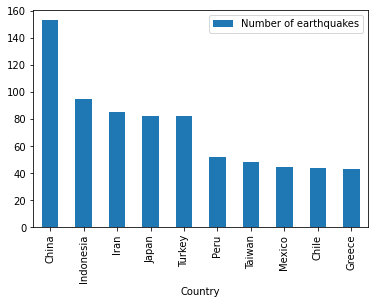

In [15]:
common_eq_df.head(10).plot(kind='bar',x='Country',y='Number of earthquakes');

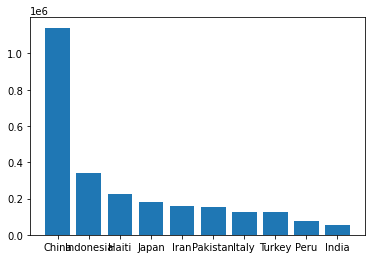

In [16]:
deadly_bar = plt.bar(x=top_10_deadly['Present-day country and link to Wikipedia article'], height=top_10_deadly['Deaths']);


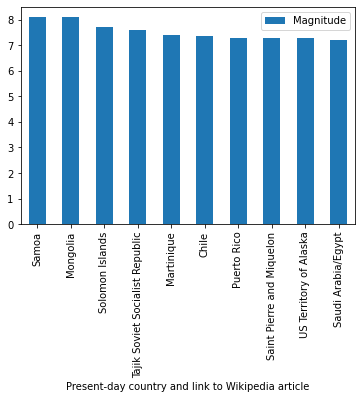

In [17]:
strongavg_bar = top_10_strongavg.plot(kind='bar',x='Present-day country and link to Wikipedia article',y='Magnitude');

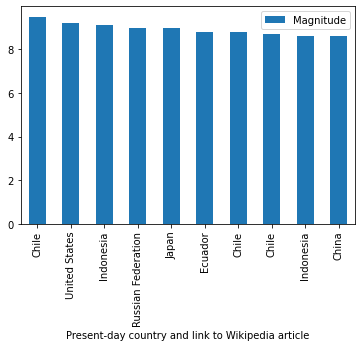

In [22]:
strong_bar = top_10_strong.plot(kind='bar',x='Present-day country and link to Wikipedia article',y='Magnitude');

In [23]:
#why does chile show up 3 times on the high mag high frequency quake lists but not the most deadly? they have some of the most training/preparation for earthquake evacuations

In [ ]:
#there's a tectonic plate that iran, china, japan, and indonesia are all on which accounts for why they have so many earthquakes. china has been tracking earthquakes since 1300s which explains why their count is so much higher